<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Libraries-and-data" data-toc-modified-id="Import-Libraries-and-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Libraries and data</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Training</a></span></li><li><span><a href="#Selecting-Best-model" data-toc-modified-id="Selecting-Best-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Selecting Best model</a></span></li><li><span><a href="#Finalizing-and-Saving-Model" data-toc-modified-id="Finalizing-and-Saving-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Finalizing and Saving Model</a></span></li></ul></div>

## Import Libraries and data

In [3]:
import pandas as pd
import numpy as np
# For visualization
from IPython.display import display, HTML

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [102]:
#base = pd.read_csv('https://raw.githuusercontentb.com/JohnTan38/Zomato/main/HoldoutData.csv')
train = pd.read_csv('https://raw.githubusercontent.com/JohnTan38/Zomato/main/TrainData.csv')
#train = pd.read_csv(r"D:/FormRecognizer/TrainData.csv")

## Exploratory Data Analysis

In [78]:
train.shape

(50891, 21)

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50891 entries, 0 to 50890
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 50891 non-null  int64  
 1   Churn                      50891 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  int64  
 4   TotalRecurringCharge       50891 non-null  int64  
 5   DirectorAssistedCalls      50891 non-null  float64
 6   CustomerCareCalls          50891 non-null  float64
 7   ReceivedCalls              50891 non-null  float64
 8   OutboundCalls              50891 non-null  float64
 9   InboundCalls               50891 non-null  float64
 10  MonthsInService            50891 non-null  int64  
 11  UniqueSubs                 50891 non-null  int64  
 12  ActiveSubs                 50891 non-null  int64  
 13  HasCreditCard              50891 non-null  obj

In [80]:
train.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,CustomerCareCalls,ReceivedCalls,OutboundCalls,InboundCalls,MonthsInService,UniqueSubs,ActiveSubs,HasCreditCard,RetentionCalls,RetentionOffersAccepted,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation
0,3000002,Yes,24.00,219,22,0.25,0.0,97.2,0.0,0.0,61,2,1,Yes,1,0,4,0,1-Highest,Suburban,Professional
1,3000010,Yes,16.99,10,17,0.00,0.0,0.0,0.0,0.0,58,1,1,Yes,0,0,5,0,4-Medium,Suburban,Professional
2,3000014,No,38.00,8,38,0.00,0.0,0.4,0.3,0.0,60,1,1,Yes,0,0,6,0,3-Good,Town,Crafts
3,3000022,No,82.28,1312,75,1.24,4.3,200.3,370.3,147.0,59,2,2,Yes,0,0,6,0,4-Medium,Other,Other
4,3000026,Yes,17.14,0,17,0.00,0.0,0.0,0.0,0.0,53,2,2,Yes,0,0,9,1,1-Highest,Other,Professional


In [81]:
# Check columns list and missing values
train.replace(np.nan,0)
train.dropna(axis=0, inplace=True)
train.isnull().sum()

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
CustomerCareCalls            0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
HasCreditCard                0
RetentionCalls               0
RetentionOffersAccepted      0
IncomeGroup                  0
AdjustmentsToCreditRating    0
CreditRating                 0
PrizmCode                    0
Occupation                   0
dtype: int64

In [82]:
train.describe(include =['object'])

,Churn,HasCreditCard,CreditRating,PrizmCode,Occupation
count,50891,50891,50891,50891,50891
unique,2,2,7,4,8
top,No,Yes,2-High,Other,Other
freq,36250,34397,18992,24566,37526


In [83]:
train.describe()

,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,CustomerCareCalls,ReceivedCalls,OutboundCalls,InboundCalls,MonthsInService,UniqueSubs,ActiveSubs,RetentionCalls,RetentionOffersAccepted,IncomeGroup,AdjustmentsToCreditRating
count,5.089100e+04,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.00000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000,50891.000000
mean,3.201611e+06,58.834492,525.653416,46.830088,0.895229,1.872987,114.971453,25.40470,8.190515,18.716197,1.531744,1.353854,0.037020,0.018235,4.324163,0.053683
std,1.166734e+05,44.507336,529.871063,23.848871,2.228546,5.101041,166.526538,35.17331,16.675776,9.769439,1.224428,0.675568,0.205746,0.142341,3.138110,0.382084
min,3.000002e+06,-6.170000,0.000000,-11.000000,0.000000,0.000000,0.000000,0.00000,0.000000,6.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100484e+06,33.610000,158.000000,30.000000,0.000000,0.000000,8.500000,3.30000,0.000000,11.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,3.201226e+06,48.460000,366.000000,45.000000,0.250000,0.000000,52.900000,13.70000,2.000000,16.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
75%,3.304720e+06,71.065000,723.000000,60.000000,0.990000,1.700000,153.800000,34.00000,9.300000,24.000000,2.000000,2.000000,0.000000,0.000000,7.000000,0.000000
max,3.399974e+06,1223.380000,7359.000000,400.000000,159.390000,327.300000,2692.400000,644.30000,519.300000,61.000000,196.000000,53.000000,4.000000,3.000000,9.000000,25.000000


In [84]:
corrMatrix = train.corr()
corrMatrix.style.background_gradient(cmap='viridis',axis=None).set_precision(2)

C:\Users\guest_dpdq7co\AppData\Local\Temp\ipykernel_10252\1968381217.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrMatrix = train.corr()
C:\Users\guest_dpdq7co\AppData\Local\Temp\ipykernel_10252\1968381217.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corrMatrix.style.background_gradient(cmap='viridis',axis=None).set_precision(2)


,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,CustomerCareCalls,ReceivedCalls,OutboundCalls,InboundCalls,MonthsInService,UniqueSubs,ActiveSubs,RetentionCalls,RetentionOffersAccepted,IncomeGroup,AdjustmentsToCreditRating
CustomerID,1.00,0.00,0.09,0.05,-0.00,0.12,0.04,0.04,0.03,-0.76,-0.02,-0.04,-0.06,-0.05,-0.14,-0.17
MonthlyRevenue,0.00,1.00,0.71,0.63,0.41,0.19,0.61,0.50,0.37,-0.00,-0.01,-0.04,0.01,0.02,-0.08,0.03
MonthlyMinutes,0.09,0.71,1.00,0.58,0.39,0.38,0.83,0.69,0.56,-0.07,-0.03,-0.07,0.01,0.02,-0.14,0.05
TotalRecurringCharge,0.05,0.63,0.58,1.00,0.31,0.15,0.48,0.41,0.31,-0.05,-0.02,-0.06,-0.02,-0.00,-0.08,0.04
DirectorAssistedCalls,-0.00,0.41,0.39,0.31,1.00,0.09,0.28,0.32,0.19,0.02,-0.00,-0.01,0.01,0.01,-0.02,0.02
CustomerCareCalls,0.12,0.19,0.38,0.15,0.09,1.00,0.30,0.29,0.22,-0.11,-0.05,-0.09,0.03,0.02,-0.12,0.02
ReceivedCalls,0.04,0.61,0.83,0.48,0.28,0.30,1.00,0.65,0.62,-0.02,-0.02,-0.05,0.01,0.01,-0.13,0.04
OutboundCalls,0.04,0.50,0.69,0.41,0.32,0.29,0.65,1.00,0.72,-0.02,0.02,0.01,0.01,0.01,-0.10,0.04
InboundCalls,0.03,0.37,0.56,0.31,0.19,0.22,0.62,0.72,1.00,-0.01,0.05,0.07,0.00,0.01,-0.10,0.04
MonthsInService,-0.76,-0.00,-0.07,-0.05,0.02,-0.11,-0.02,-0.02,-0.01,1.00,0.02,0.03,0.07,0.05,0.14,0.22


In [85]:
# Select upper triangle of correlation matrix
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

C:\Users\guest_dpdq7co\AppData\Local\Temp\ipykernel_10252\2459635435.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))


[]

In [27]:
# Drop highly correlated features 
train.drop(to_drop, axis=1, inplace=True)

In [86]:
corr_cat = train.select_dtypes(include=['object']).apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
corr_cat.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)

C:\Users\guest_dpdq7co\AppData\Local\Temp\ipykernel_10252\2033281267.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_cat.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)


,Churn,HasCreditCard,CreditRating,PrizmCode,Occupation
Churn,1.00,-0.01,0.03,-0.01,-0.00
HasCreditCard,-0.01,1.00,0.12,0.12,0.11
CreditRating,0.03,0.12,1.00,0.05,0.02
PrizmCode,-0.01,0.12,0.05,1.00,0.06
Occupation,-0.00,0.11,0.02,0.06,1.00


C:\Users\guest_dpdq7co\AppData\Local\Temp\ipykernel_10252\2842636189.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


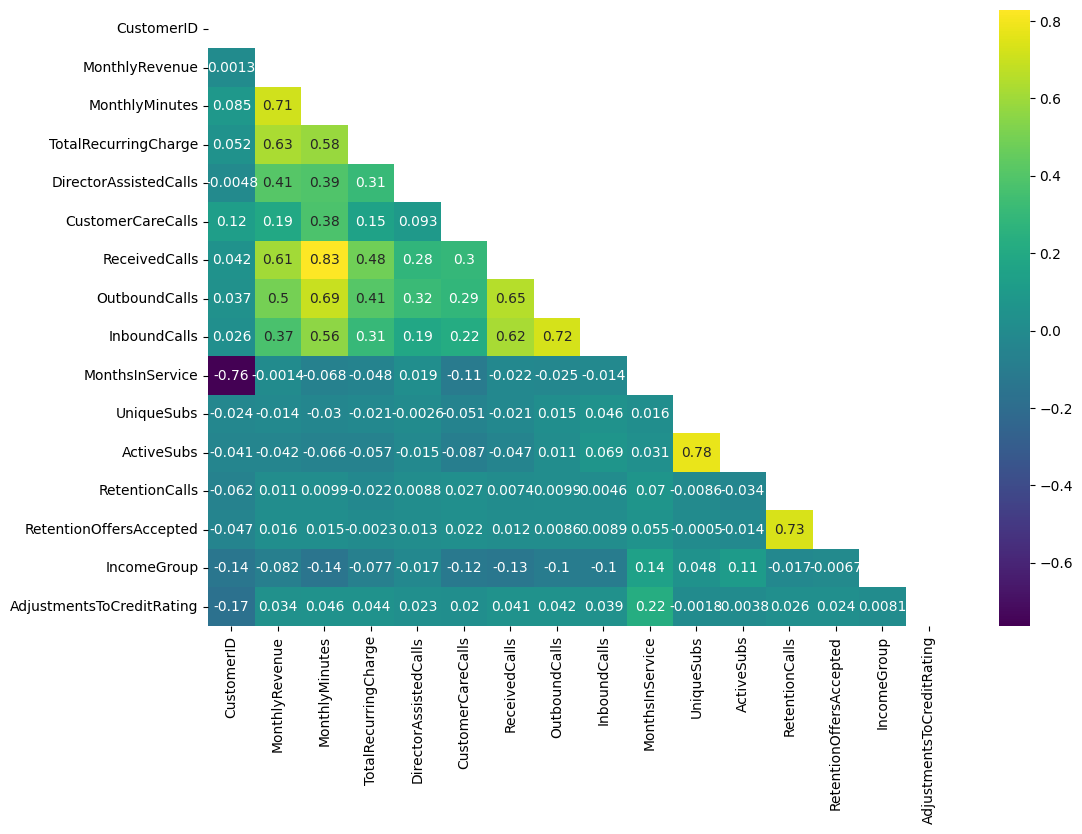

In [87]:
train_cor = train.copy()
plt.figure(figsize=(12,8))
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap='viridis')
plt.show()

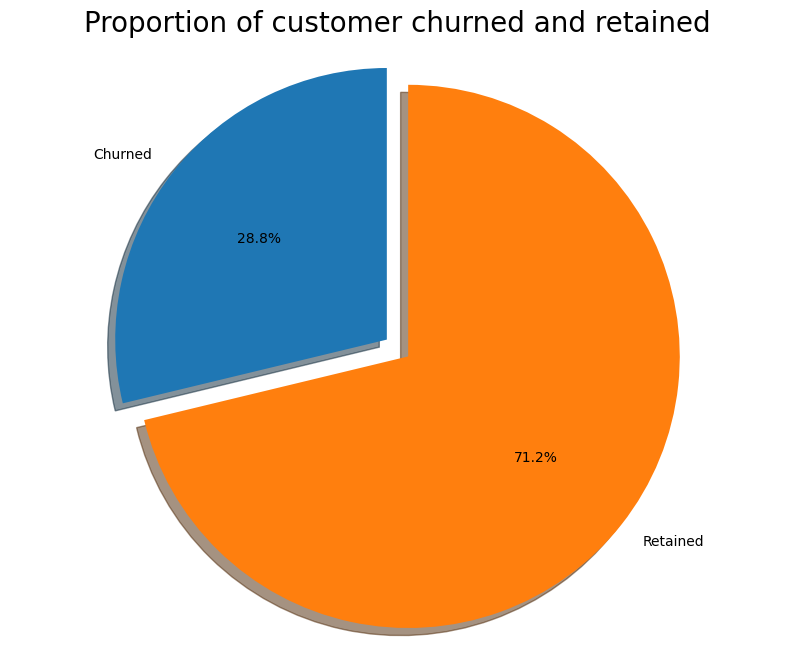

In [88]:
labels = 'Churned', 'Retained'
sizes = [train.Churn[train['Churn']=='Yes'].count(), train.Churn[train['Churn']=='No'].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

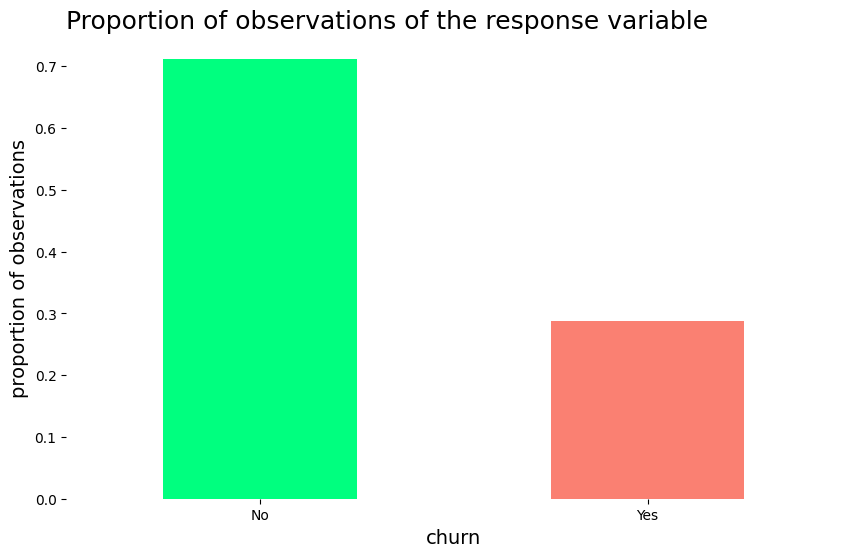

In [89]:
# create a figure
fig = plt.figure(figsize=(10, 6)) 
ax = fig.add_subplot(111)

# proportion of observation of each class
prop_response = train['Churn'].value_counts(normalize=True)

# create a bar plot showing the percentage of churn
prop_response.plot(kind='bar', 
                   ax=ax,
                   color=['springgreen','salmon'])

# set title and labels
ax.set_title('Proportion of observations of the response variable',
             fontsize=18, loc='left')
ax.set_xlabel('churn',
              fontsize=14)
ax.set_ylabel('proportion of observations',
              fontsize=14)
ax.tick_params(rotation='auto')

# eliminate the frame from the plot
spine_names = ('top', 'right', 'bottom', 'left')
for spine_name in spine_names:
    ax.spines[spine_name].set_visible(False)

In [103]:
train_transformed = train.copy()
train_1 = train.copy()

# label encoding (binary variables)
label_encoding_columns = ['CreditRating', 'PrizmCode', 'Churn']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'CreditRating':
        train_transformed[column] = train_transformed[column].map({'1-Highest': 1, '2-High': 2, '3-Good': 3, '4-Medium': 4, '5-Low': 5, '6-VeryLow': 6, '7-Lowest': 7})
    #else: 
        #train_transformed[column] = train_transformed[column].map({'Yes': 1, 'No': 0})

for column in label_encoding_columns:
    if column == 'Churn':
        train[column] = train[column].map({'Yes': 1, 'No': 0})
    elif column == 'CreditRating':
        train[column] = train[column].map({'1-Highest': 1, '2-High': 2, '3-Good': 3, '4-Medium': 4, '5-Low': 5, '6-VeryLow': 6, '7-Lowest': 7})
    elif column == 'PrizmCode':
        train[column] = train[column].map({'Town': 1, 'Suburban': 2, 'Rural': 3, 'Other': 4})
    else:
        pass

train['Occupation'] = train['Occupation'].map({'Clerical': 1, 'Crafts': 2, 'Homemaker': 3, 'Other': 4, 'Professional': 5, 'Retired': 6, 'Self': 7, 'Student': 8})

In [105]:
train.drop('HasCreditCard', axis=1, inplace=True)

In [106]:
train.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,CustomerCareCalls,ReceivedCalls,OutboundCalls,InboundCalls,MonthsInService,UniqueSubs,ActiveSubs,RetentionCalls,RetentionOffersAccepted,IncomeGroup,AdjustmentsToCreditRating,CreditRating,PrizmCode,Occupation
0,3000002,1,24.00,219,22,0.25,0.0,97.2,0.0,0.0,61,2,1,1,0,4,0,1,2,5
1,3000010,1,16.99,10,17,0.00,0.0,0.0,0.0,0.0,58,1,1,0,0,5,0,4,2,5
2,3000014,0,38.00,8,38,0.00,0.0,0.4,0.3,0.0,60,1,1,0,0,6,0,3,1,2
3,3000022,0,82.28,1312,75,1.24,4.3,200.3,370.3,147.0,59,2,2,0,0,6,0,4,4,4
4,3000026,1,17.14,0,17,0.00,0.0,0.0,0.0,0.0,53,2,2,0,0,9,1,1,4,5


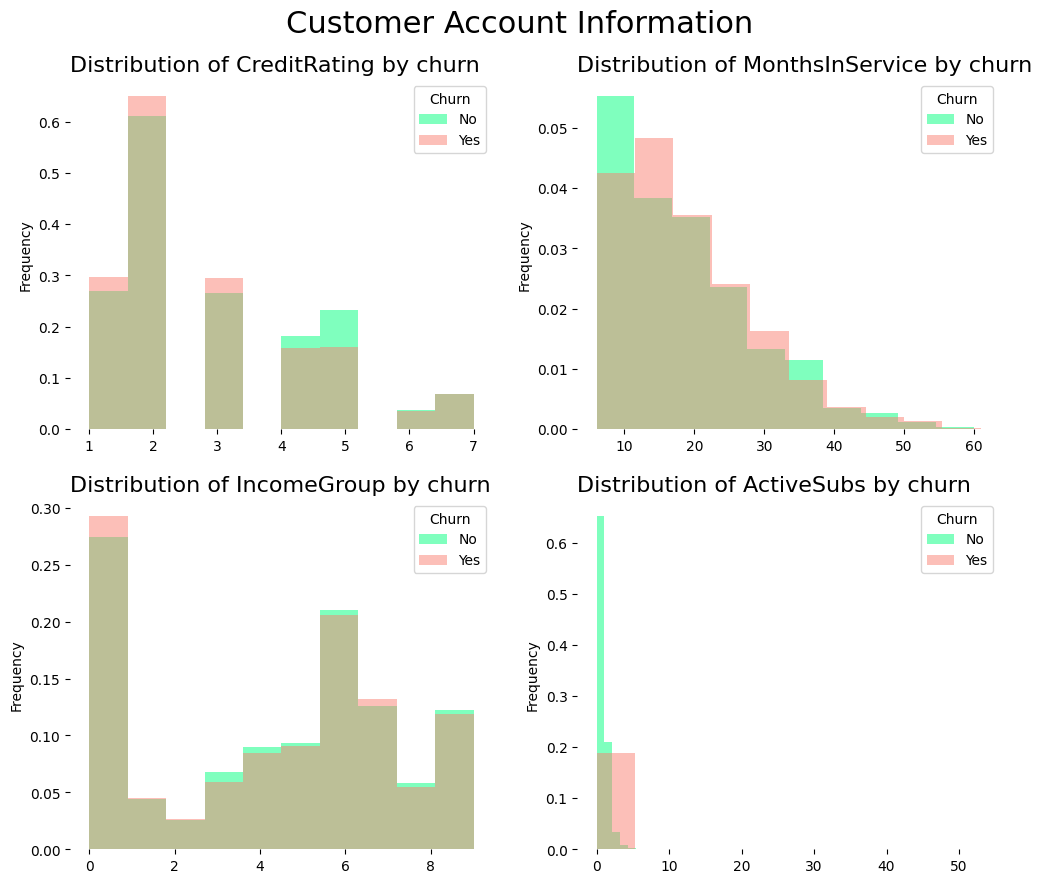

In [96]:
import math
def histogram_plots(columns_to_plot, super_title):
    
     
    # set number of rows and number of columns
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each demographic column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # histograms for each class (normalized histogram)
        train_transformed[train_transformed['Churn']=='No'][column].plot(kind='hist', ax=ax, density=True, 
                                                       alpha=0.5, color='springgreen', label='No')
        train_transformed[train_transformed['Churn']=='Yes'][column].plot(kind='hist', ax=ax, density=True,
                                                        alpha=0.5, color='salmon', label='Yes')
        
        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Distribution of ' + column + ' by churn',
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)
            
# customer account column names
account_columns_numeric = ['CreditRating', 'MonthsInService', 'IncomeGroup', 'ActiveSubs']
# histogram of costumer account columns 
histogram_plots(account_columns_numeric, 'Customer Account Information')


<AxesSubplot: xlabel='MonthsInService', ylabel='count'>

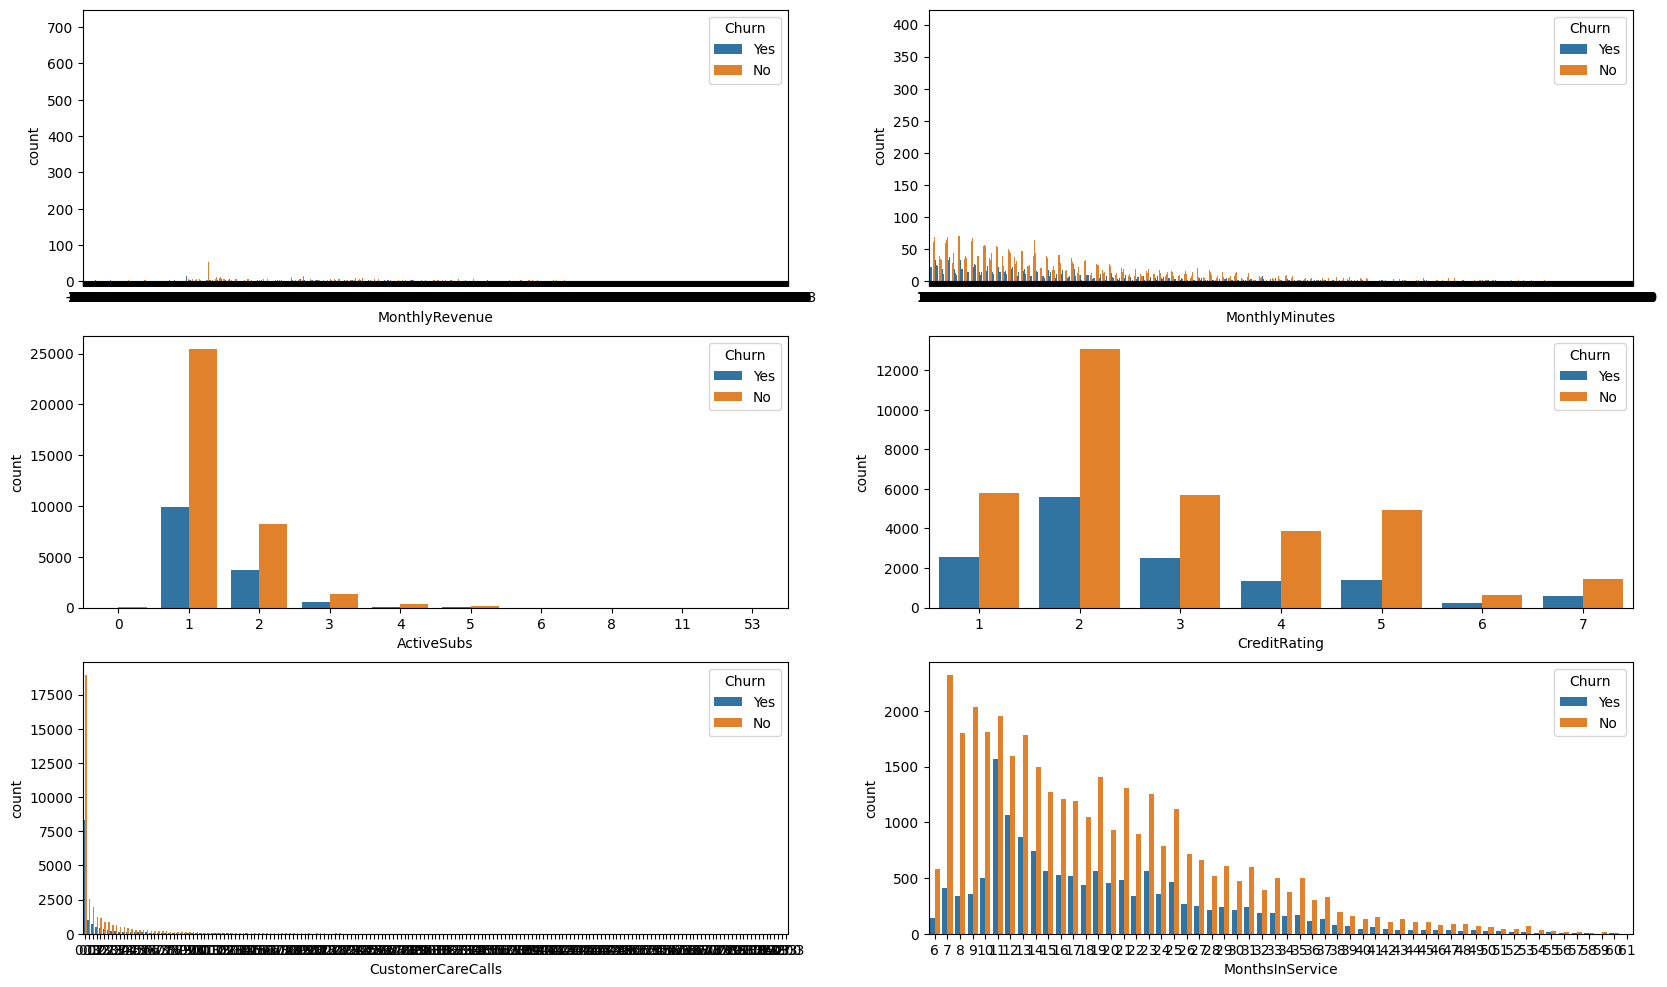

In [138]:
    # We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.countplot(x='MonthlyRevenue', hue = 'Churn',data = train, ax=axarr[0][0])
sns.countplot(x='MonthlyMinutes', hue = 'Churn',data = train, ax=axarr[0][1])
sns.countplot(x='ActiveSubs', hue = 'Churn',data = train, ax=axarr[1][0])
sns.countplot(x='CreditRating', hue = 'Churn',data = train, ax=axarr[1][1])
sns.countplot(x='CustomerCareCalls', hue = 'Churn',data = train, ax=axarr[2][0])
sns.countplot(x='MonthsInService', hue = 'Churn',data = train, ax=axarr[2][1])

In [108]:
for col in train.select_dtypes(exclude=['object']):
    print("\n","#"*15, "Descriptive statistics for :",col,"#"*15)
    display(train.groupby(["Churn"])[col].describe())


 ############### Descriptive statistics for : CustomerID ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,3.204625e+06,118841.930385,3000014.0,3100875.0,3203944.0,3313040.0,3399974.0
1,14641.0,3.194148e+06,110773.755863,3000002.0,3099362.0,3195614.0,3285962.0,3399946.0



 ############### Descriptive statistics for : Churn ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14641.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0



 ############### Descriptive statistics for : MonthlyRevenue ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,59.173538,44.504027,-6.17,34.10,48.815,71.6175,1223.38
1,14641.0,57.995041,44.505934,0.00,32.52,47.520,69.9500,861.11



 ############### Descriptive statistics for : MonthlyMinutes ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,542.546483,538.816505,0.0,170.0,381.0,743.0,7359.0
1,14641.0,483.827471,504.634392,0.0,132.0,330.0,667.0,5410.0



 ############### Descriptive statistics for : TotalRecurringCharge ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,47.759117,24.125276,-9.0,30.0,45.0,60.0,400.0
1,14641.0,44.529882,22.990134,-11.0,30.0,44.0,55.0,338.0



 ############### Descriptive statistics for : DirectorAssistedCalls ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,0.922870,2.329606,0.0,0.0,0.25,0.99,159.39
1,14641.0,0.826793,1.954381,0.0,0.0,0.25,0.74,45.79



 ############### Descriptive statistics for : CustomerCareCalls ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,1.986717,5.345584,0.0,0.0,0.0,1.7,327.3
1,14641.0,1.591401,4.425574,0.0,0.0,0.0,1.3,172.3



 ############### Descriptive statistics for : ReceivedCalls ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,118.867145,169.766327,0.0,9.6,56.2,158.6,2692.4
1,14641.0,105.326016,157.812200,0.0,5.9,45.4,140.9,2619.3



 ############### Descriptive statistics for : OutboundCalls ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,26.118011,35.669719,0.0,3.7,14.0,34.7,644.3
1,14641.0,23.638597,33.849554,0.0,2.3,12.3,31.7,520.3



 ############### Descriptive statistics for : InboundCalls ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,8.549503,17.233981,0.0,0.0,2.3,9.7,519.3
1,14641.0,7.301687,15.169827,0.0,0.0,1.7,8.0,298.3



 ############### Descriptive statistics for : MonthsInService ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,18.602869,9.946682,6.0,11.0,16.0,24.0,60.0
1,14641.0,18.996790,9.310494,6.0,12.0,17.0,24.0,61.0



 ############### Descriptive statistics for : UniqueSubs ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,1.505490,0.843378,1.0,1.0,1.0,2.0,12.0
1,14641.0,1.596749,1.855895,1.0,1.0,1.0,2.0,196.0



 ############### Descriptive statistics for : ActiveSubs ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,1.347641,0.637353,0.0,1.0,1.0,2.0,11.0
1,14641.0,1.369237,0.761788,0.0,1.0,1.0,2.0,53.0



 ############### Descriptive statistics for : RetentionCalls ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,0.028497,0.180237,0.0,0.0,0.0,0.0,3.0
1,14641.0,0.058124,0.257077,0.0,0.0,0.0,0.0,4.0



 ############### Descriptive statistics for : RetentionOffersAccepted ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,0.015090,0.129590,0.0,0.0,0.0,0.0,3.0
1,14641.0,0.026023,0.169596,0.0,0.0,0.0,0.0,3.0



 ############### Descriptive statistics for : IncomeGroup ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,4.348662,3.127163,0.0,1.0,5.0,7.0,9.0
1,14641.0,4.263507,3.164344,0.0,0.0,5.0,7.0,9.0



 ############### Descriptive statistics for : AdjustmentsToCreditRating ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,0.057793,0.411359,0.0,0.0,0.0,0.0,25.0
1,14641.0,0.043508,0.297219,0.0,0.0,0.0,0.0,9.0



 ############### Descriptive statistics for : CreditRating ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,2.931917,1.593716,1.0,2.0,2.0,4.0,7.0
1,14641.0,2.771122,1.544646,1.0,2.0,2.0,4.0,7.0



 ############### Descriptive statistics for : PrizmCode ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,2.867421,1.173197,1.0,2.0,3.0,4.0,4.0
1,14641.0,2.855338,1.180025,1.0,2.0,3.0,4.0,4.0



 ############### Descriptive statistics for : Occupation ###############


,count,mean,std,min,25%,50%,75%,max
Churn,,,,,,,,
0,36250.0,4.164166,0.880577,1.0,4.0,4.0,4.0,8.0
1,14641.0,4.154293,0.875847,1.0,4.0,4.0,4.0,8.0


<AxesSubplot: xlabel='Churn', ylabel='CreditRating'>

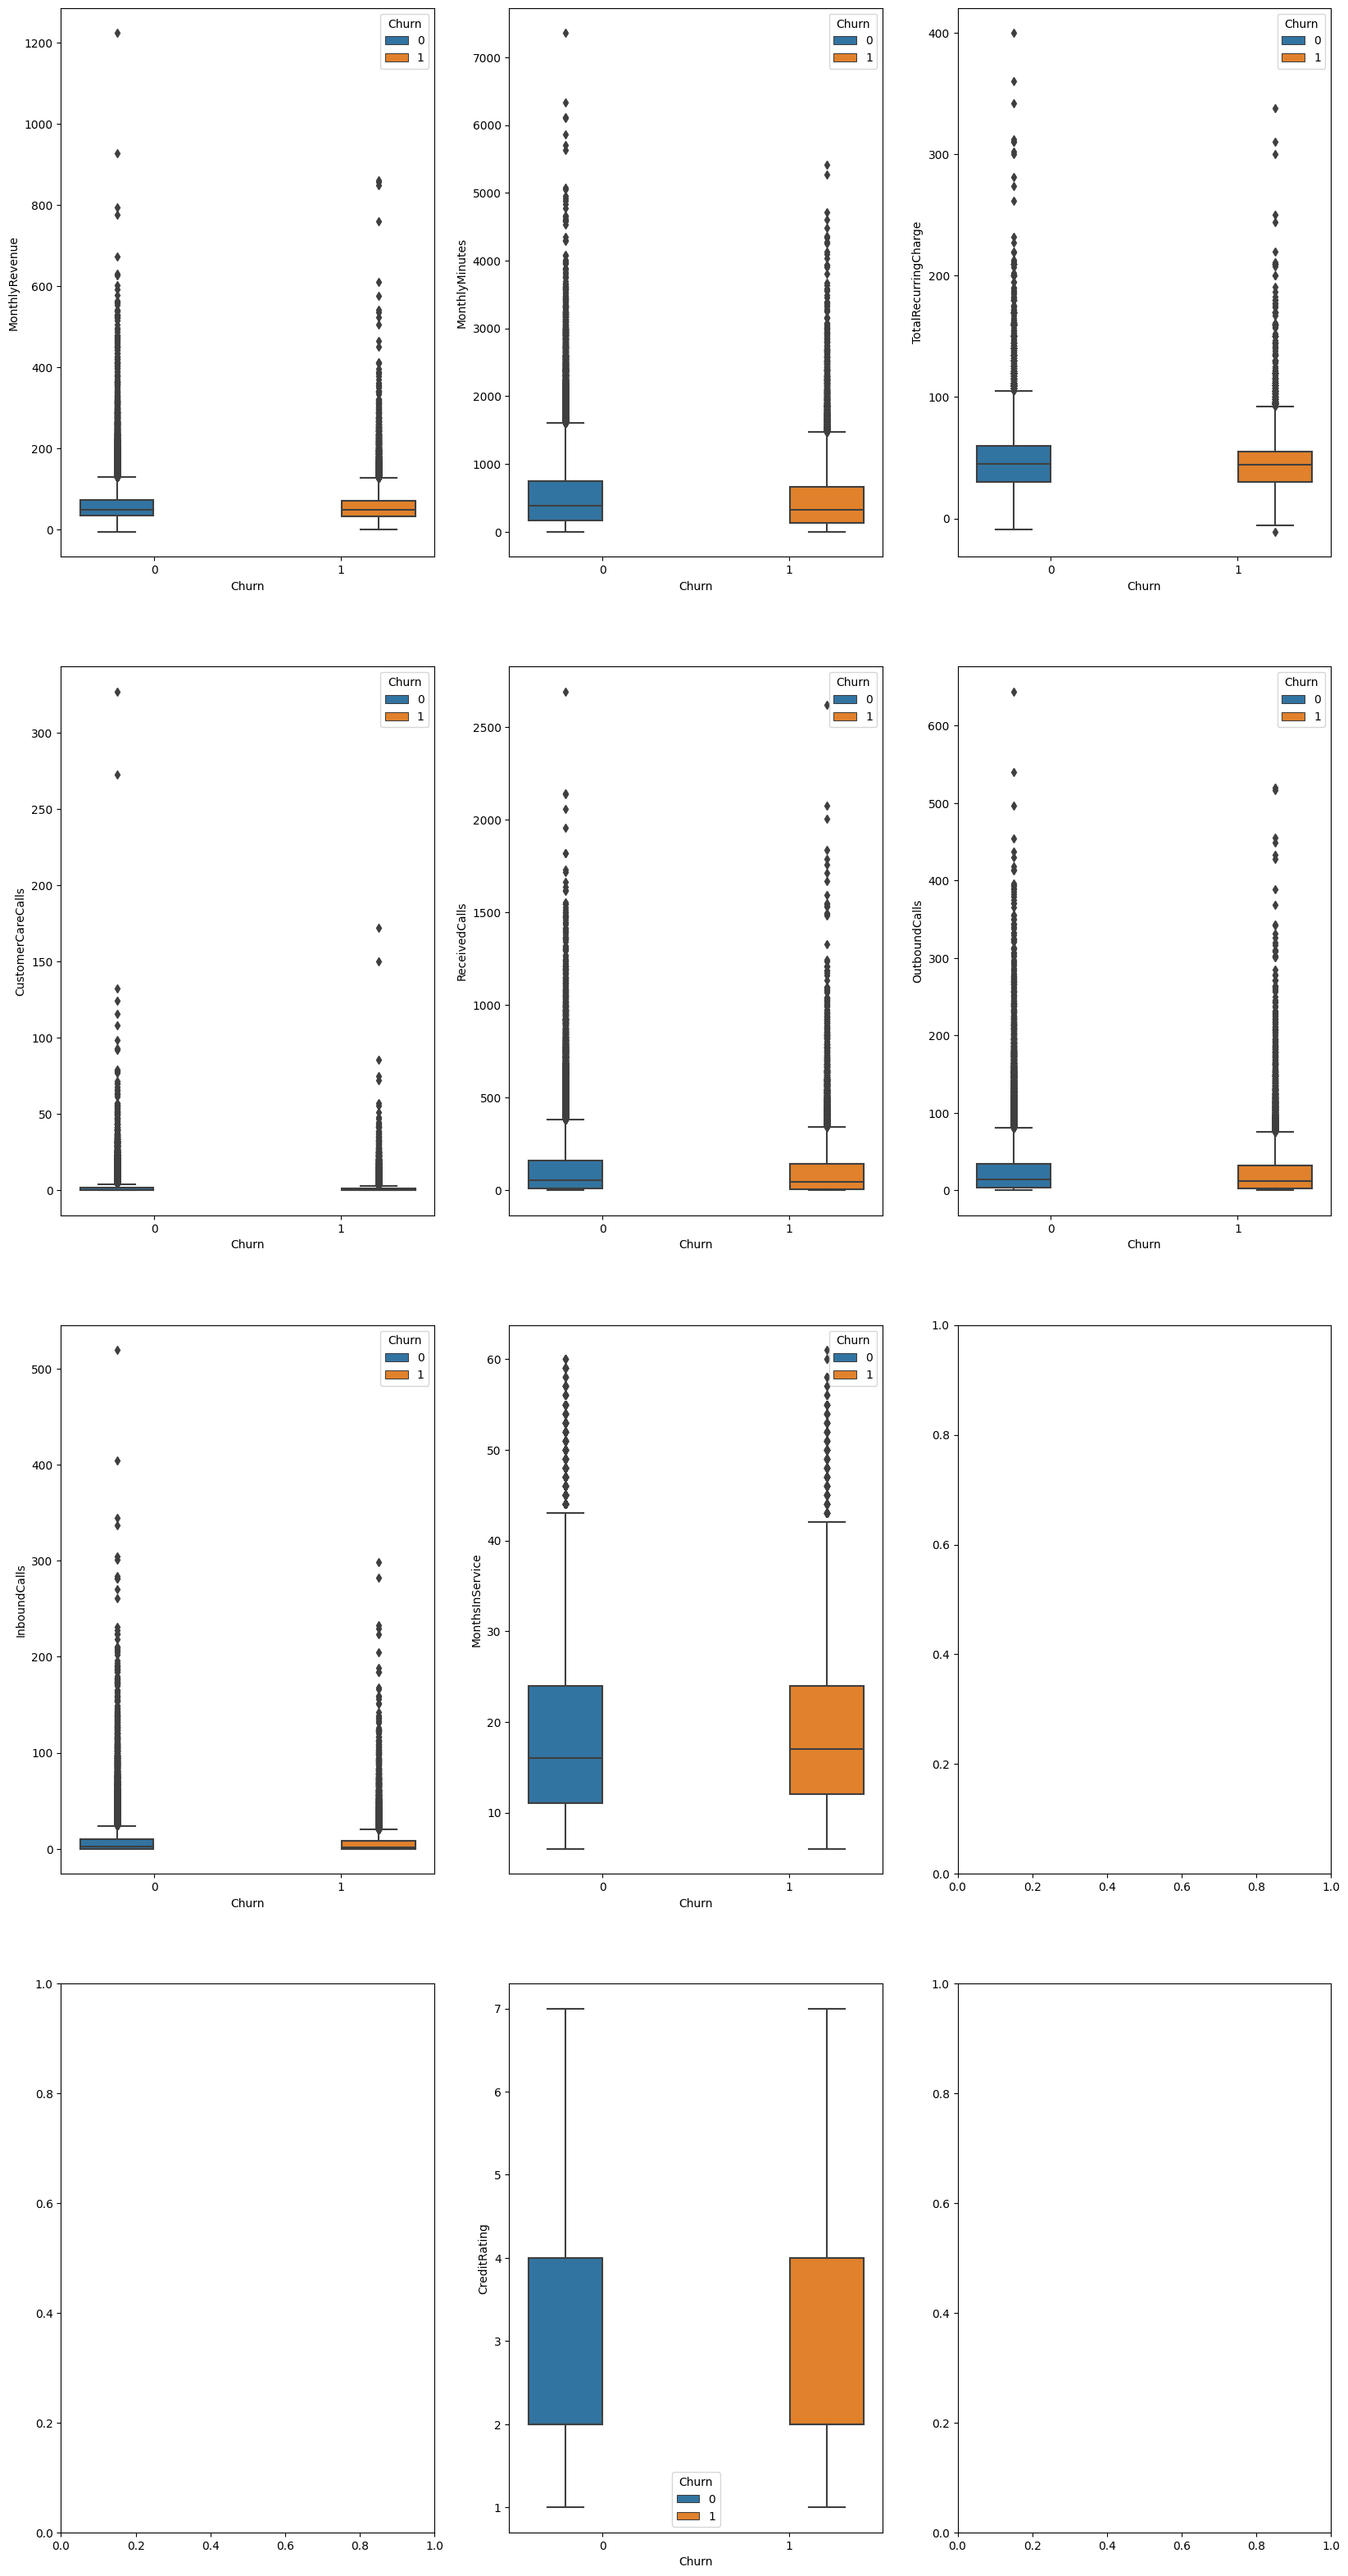

In [139]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(4, 3, figsize=(20, 40))
sns.boxplot(y='MonthlyRevenue',x = 'Churn', hue = 'Churn',data = train, ax=axarr[0][0])
sns.boxplot(y='MonthlyMinutes',x = 'Churn', hue = 'Churn',data = train , ax=axarr[0][1])
sns.boxplot(y='TotalRecurringCharge',x = 'Churn', hue = 'Churn',data = train, ax=axarr[0][2])
sns.boxplot(y='CustomerCareCalls',x = 'Churn', hue = 'Churn',data = train, ax=axarr[1][0])
sns.boxplot(y='ReceivedCalls',x = 'Churn', hue = 'Churn',data = train, ax=axarr[1][1])
sns.boxplot(y='OutboundCalls',x = 'Churn', hue = 'Churn',data = train, ax=axarr[1][2])
sns.boxplot(y='InboundCalls',x = 'Churn', hue = 'Churn',data = train, ax=axarr[2][0])
sns.boxplot(y='MonthsInService',x = 'Churn', hue = 'Churn',data = train, ax=axarr[2][1])
sns.boxplot(y='CreditRating',x = 'Churn', hue = 'Churn',data = train, ax=axarr[3][1])

C:\Users\guest_dpdq7co\AppData\Local\Temp\ipykernel_10252\3582131434.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['MonthsInService'], ax=ax1)


<AxesSubplot: xlabel='MonthsInService'>

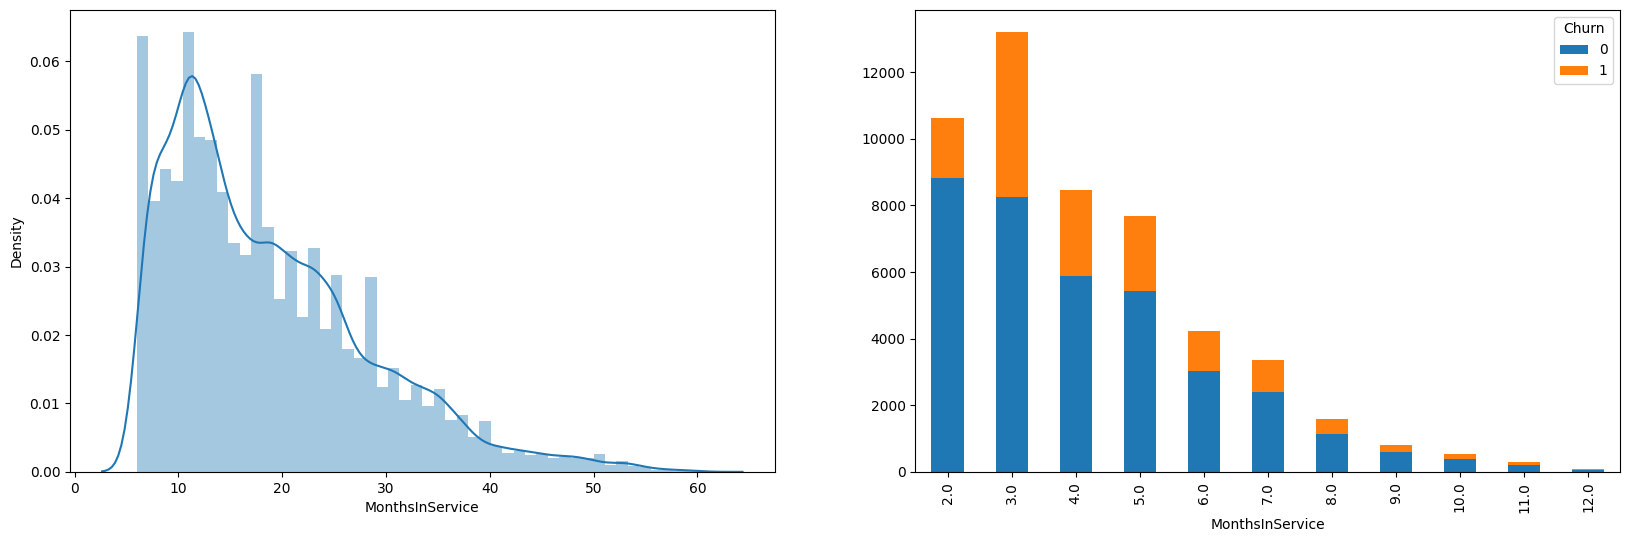

In [109]:
import seaborn as sns
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20, 6))

# distribution plot for aon
sns.distplot(train['MonthsInService'], ax=ax1)

# bin the aon column with yearwise segments and plot the counts for each segments
bins = [0, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
labels = [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
#sns.countplot(pd.cut(round(((data['aon']/30)/12),1), bins = bins, labels = labels ), ax =ax1)
pd.crosstab(pd.cut(round(((train['MonthsInService']/1)/5),30), bins = bins, labels = labels ), train['Churn']).plot(kind='bar', stacked=True, ax = ax2)

Feature: 0, Score: 0.05759
Feature: 1, Score: 0.05552
Feature: 2, Score: 0.05214
Feature: 3, Score: 0.05242
Feature: 4, Score: 0.05032
Feature: 5, Score: 0.05584
Feature: 6, Score: 0.05249
Feature: 7, Score: 0.05563
Feature: 8, Score: 0.05077
Feature: 9, Score: 0.05060
Feature: 10, Score: 0.05125
Feature: 11, Score: 0.05332
Feature: 12, Score: 0.05013
Feature: 13, Score: 0.05286
Feature: 14, Score: 0.05069
Feature: 15, Score: 0.05071
Feature: 16, Score: 0.05446
Feature: 17, Score: 0.05146
Feature: 18, Score: 0.05178


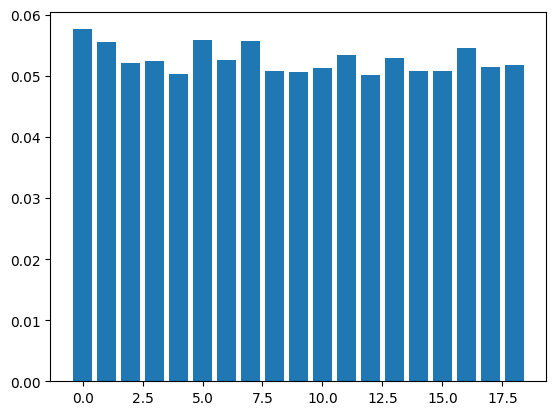

In [143]:
# random forest feature importance on a classification problem
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
model = RandomForestClassifier()
model.fit(X_train_pca, y_train)

importance = model.feature_importances_ # get importance

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v)) # summarize feature importance

plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [12]:
# min-max normalization (numeric variables)
min_max_columns = ['MonthlyRevenue', 'MonthlyMinutes']

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = train[column].min()
        # maximum value of the column
        max_column = train[column].max()
        # min max scaler
        train[column] = (train[column] - min_column) / (max_column - min_column)

In [ ]:
# select independent variables
X = train.drop(columns='Churn')

# select dependent variables
y = train.loc[:, 'Churn']

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)

In [112]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40, shuffle=True)

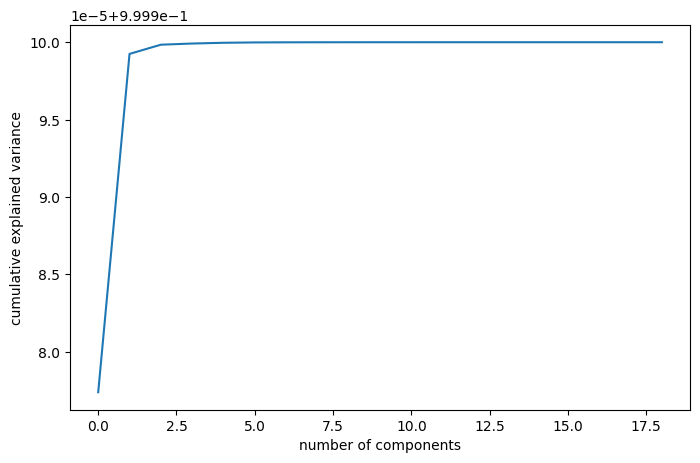

In [113]:
#initialize the pca with randomized
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=40)
pca.fit(X_train) # fit the training dataset
%matplotlib inline
fig = plt.figure(figsize = (8,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

ca = PCA(n_components=3, random_state=40)
X_train_pca = pca.fit_transform(X_train) # fit and transform the training dataset
X_test_pca = pca.transform(X_test) #transform the testing dataset
X_pca = pca.fit_transform(X) # fit and transform the whole dataset

In [111]:
# select independent variables
X = train.drop(columns='Churn')

# select dependent variables
y = train.loc[:, 'Churn']

# prove that the variables were selected correctly
print(X.columns)

# prove that the variables were selected correctly
print(y.name)
33

Index(['CustomerID', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'CustomerCareCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'MonthsInService',
       'UniqueSubs', 'ActiveSubs', 'RetentionCalls', 'RetentionOffersAccepted',
       'IncomeGroup', 'AdjustmentsToCreditRating', 'CreditRating', 'PrizmCode',
       'Occupation'],
      dtype='object')
Churn


33

In [115]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [116]:
model_score_list = []
def evaluate_model(actual, pred):
    
    acc_score = round(accuracy_score(actual, pred)*100,2) # Accuracy Score
    print('Accuracy Score : ',acc_score)
    roc_score = round(roc_auc_score(actual, pred)*100,2) # ROC AUC score
    print('ROC AUC score : ',roc_score)
    
    prec_score = round(precision_score(actual, pred)*100,2) # Precision score
    print('Precision score : ', prec_score)
    rec_score = round(recall_score(actual, pred)*100,2) # Recall score
    print('Recall score : ', rec_score)

    return acc_score, roc_score, prec_score, rec_score


In [117]:
def create_models(seed=2):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''

    models = []
    models.append(('dummy_classifier', DummyClassifier(random_state=seed, strategy='most_frequent')))
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('support_vector_machines', LinearSVC(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))
    
    return models

# create a list with all the algorithms we are going to assess
models = create_models()

In [119]:
# test the accuracy of each model using default hyperparameters
results = []
names = []
model_score_list = []
scoring = 'accuracy'
for name, model in models:
    # fit the model with the training data
    model.fit(X_train_pca, y_train).predict(X_test_pca)
    # make predictions with the testing data
    predictions = model.predict(X_test_pca)
    # calculate accuracy 
    accuracy = accuracy_score(y_test, predictions)
    # append the model name and the accuracy to the lists
    results.append(accuracy)
    names.append(name)

    acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, predictions)
    model_score_list.append({'model_name':model, 'acc_score':acc_score, 'roc_score':roc_score, 'precision_score':prec_score, 'recall_score':rec_score})


    # print classifier accuracy
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: dummy_classifier, Accuracy: 0.7125454366833677)
Classifier: k_nearest_neighbors, Accuracy: 0.6531093427645152)
Classifier: logistic_regression, Accuracy: 0.5391492288044012)


c:\Users\guest_dpdq7co\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Classifier: support_vector_machines, Accuracy: 0.5601729050004912)
Classifier: random_forest, Accuracy: 0.7147067491895078)
Classifier: gradient_boosting, Accuracy: 0.7147067491895078)


In [120]:
# define the parameter grid
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

grid_parameters = {'n_estimators': [80, 90, 100],
                   'max_depth': [3, 4],
                   'max_features': [None, 'auto', 'sqrt', 'log2'], 
                   'min_samples_split': [3, 4]}


# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=3,
                                   n_iter=50,
                                   n_jobs=-1)

# fitting the model for random search 
random_search.fit(X_train_pca, y_train)

# print best parameter after tuning
print(random_search.best_params_)

c:\Users\guest_dpdq7co\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 48 is smaller than n_iter=50. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 100, 'min_samples_split': 4, 'max_features': 'sqrt', 'max_depth': 3}


In [121]:
# make the predictions
random_search_predictions = random_search.predict(X_test)

# construct the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, random_search_predictions)

# visualize the confusion matrix
confusion_matrix

c:\Users\guest_dpdq7co\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


array([[2094, 5159],
       [ 867, 2059]], dtype=int64)

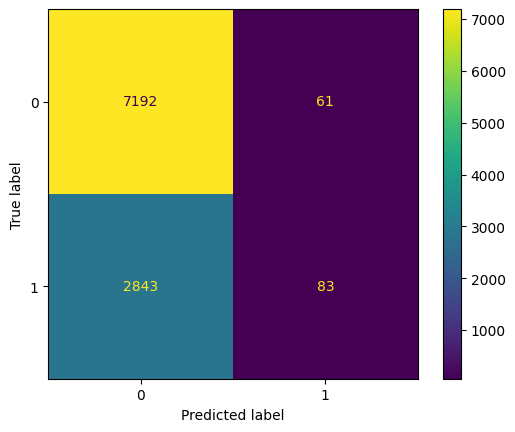

In [136]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, predictions, labels=random_search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=random_search.classes_)
disp.plot()
plt.show()

In [123]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle = True, random_state = 40)

# Cross validation for RandomForestClassifier
model = RandomForestClassifier()
rf_cv_scores = cross_val_score(model, X_pca, y, scoring='accuracy', cv = skf, n_jobs=-1)
print('RandomForestClassifier cv_score_mean : ', round(rf_cv_scores.mean() * 100, 2))
print('RandomForestClassifier cv_score_std : ', round(rf_cv_scores.std() * 100, 2))

RandomForestClassifier cv_score_mean :  71.02
RandomForestClassifier cv_score_std :  0.19


In [125]:
# initialize the model with the best estimator
model = random_search.best_estimator_

model.fit(X_train_pca, y_train) # fit the pca training dataset
Y_pred = model.predict(X_test_pca) # Predict the model with the pca testing dataset

# get the predict probablities of pca testing dataset
Y_pred_proba = model.predict_proba(X_test_pca)

Y_pred_final = pd.DataFrame({'actual':y_test,'pred_nonchurn_prob':Y_pred_proba[:,0],'pred_churn_prob':Y_pred_proba[:,1],'predicted':Y_pred})
Y_pred_final.head(5)

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    Y_pred_final[i]= Y_pred_final['pred_churn_prob'].map( lambda x: 1 if x > i else 0)
Y_pred_final.head()

Y_pred_final['final_predicted'] = Y_pred_final['pred_churn_prob'].map( lambda x: 1 if x > 0.25 else 0)

In [124]:
# print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, random_search_predictions))
# print the accuracy of the model
accuracy_score(y_test, random_search_predictions)

              precision    recall  f1-score   support

           0       0.71      0.29      0.41      7253
           1       0.29      0.70      0.41      2926

    accuracy                           0.41     10179
   macro avg       0.50      0.50      0.41     10179
weighted avg       0.59      0.41      0.41     10179



0.40799685627271837

In [128]:
# Classification Report
print('\nClassification Report : \n\n', classification_report(y_test, Y_pred_final['final_predicted']))
# Model evaluation
acc_score, roc_score, prec_score, rec_score = evaluate_model(y_test, Y_pred_final['final_predicted'])


Classification Report : 

               precision    recall  f1-score   support

           0       0.83      0.32      0.46      7253
           1       0.33      0.83      0.48      2926

    accuracy                           0.47     10179
   macro avg       0.58      0.58      0.47     10179
weighted avg       0.69      0.47      0.47     10179

Accuracy Score :  46.95
ROC AUC score :  57.85
Precision score :  33.19
Recall score :  83.49


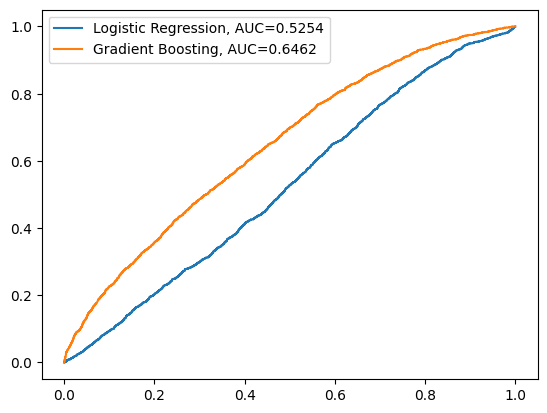

In [129]:
from sklearn import metrics
#fit logistic regression model and plot ROC curve
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(auc))

#fit gradient boosted model and plot ROC curve
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.plot(fpr,tpr,label="Gradient Boosting, AUC="+str(auc))

plt.legend()

>1 0.7120 (0.0011)
>2 0.7118 (0.0019)
>3 0.7109 (0.0020)
>4 0.7105 (0.0020)
>5 0.7097 (0.0016)


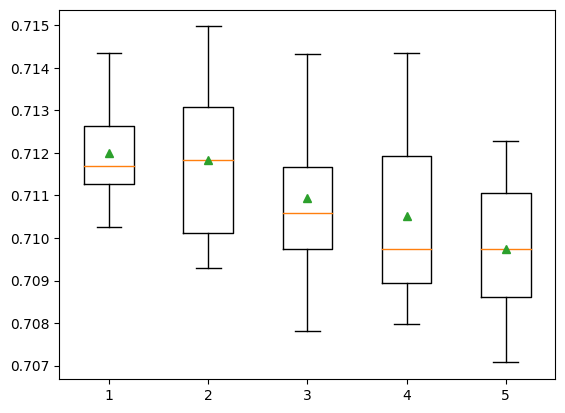

In [144]:
# explore random forest number of features effect on performance
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from matplotlib import pyplot

def get_models():
    models = dict()
    # explore number of features from 1 to 5
    for i in range(1,6):
        models[str(i)] = RandomForestClassifier(max_features=i)
    return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1) # define the evaluation procedure
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) # evaluate the model and collect the results
    return scores

models = get_models()

results, names = list(), list() # evaluate the models and store results
for name, model in models.items():
    scores = evaluate_model(model, X_train_pca, y_train) # evaluate the model
    results.append(scores)# store the results
    names.append(name)
    print('>%s %.4f (%.4f)' % (name, mean(scores), std(scores))) # summarize the performance along the way

pyplot.boxplot(results, labels=names, showmeans=True) # plot model performance for comparison
pyplot.show()

>50 0.7087 (0.0029)
>80 0.7101 (0.0022)
>120 0.7104 (0.0020)


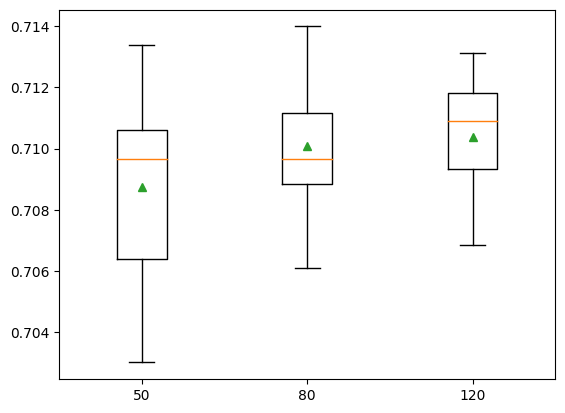

In [145]:
# explore random forest number of trees effect on performance
def get_models():
    models = dict()
    n_trees = [50, 80, 120] # define number of trees to consider
    for n in n_trees:
        models[str(n)] = RandomForestClassifier(n_estimators=n)
    return models
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1) # define the evaluation procedure
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1) # evaluate the model and collect the results
    return scores

models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train_pca, y_train) # evaluate the model
    results.append(scores) # store the results
    names.append(name)
    print('>%s %.4f (%.4f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>1 0.7122 (0.0000)
>2 0.7122 (0.0000)
>3 0.7122 (0.0000)
>4 0.7123 (0.0002)
>5 0.7125 (0.0006)
>None 0.7106 (0.0020)


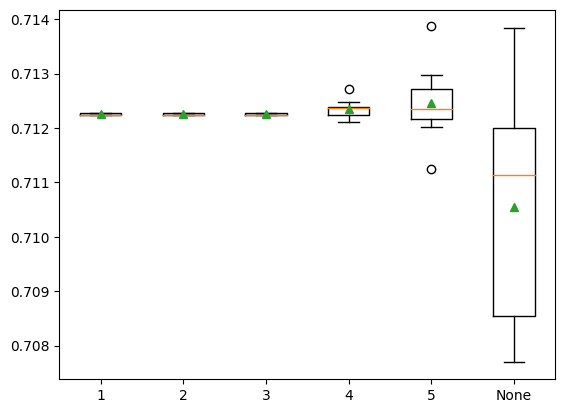

In [146]:
# explore random forest tree depth effect on performance
def get_models():
    models = dict()
    depths = [i for i in range(1,6)] + [None] # consider tree depths from 1 to 5 and None=full
    for n in depths:
        models[str(n)] = RandomForestClassifier(max_depth=n)
    return models
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1) # define the evaluation procedure
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)  # evaluate the model and collect the results
    return scores

models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X_train_pca, y_train)
    results.append(scores)
    names.append(name)
    print('>%s %.4f (%.4f)' % (name, mean(scores), std(scores)))

pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

## Model Training

In [47]:
import pycaret
from pycaret.classification import *
setting_up = setup(data = train, target = 'Churn_flag',
                   fix_imbalance = True,
                   remove_outliers = True,
                   ignore_low_variance = True,
                   normalize = True,
                   train_size = 0.9,
                   log_experiment = True, 
                   experiment_name = 'churn_smote'
                  )

ModuleNotFoundError: No module named 'pycaret'

In [21]:
setting_up[0].describe()

,account_length,total_day_minutes,total_day_calls,total_eve_minutes,total_eve_calls,total_night_minutes,total_night_calls,total_intl_minutes,total_intl_calls,state_AK,...,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes,number_customer_service_calls_0,number_customer_service_calls_1,number_customer_service_calls_2,number_customer_service_calls_3,number_customer_service_calls_4,number_customer_service_calls_5
count,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,...,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000,4037.000000
mean,-0.004086,0.004927,0.002000,0.001741,-0.001934,-0.000416,0.009578,0.002041,-0.010479,0.013129,...,0.916027,0.083973,0.741392,0.258608,0.214516,0.370572,0.231608,0.135992,0.045331,0.001982
std,0.999394,0.997838,0.992835,1.001818,0.996554,0.996621,0.996035,0.998268,0.972746,0.113839,...,0.277382,0.277382,0.437924,0.437924,0.410537,0.483018,0.421912,0.342823,0.208054,0.044477
min,-2.500048,-3.337769,-5.033498,-3.984067,-5.032413,-3.522071,-3.326863,-3.716268,-1.797300,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.686160,-0.676954,-0.650291,-0.676184,-0.661926,-0.659969,-0.688847,-0.636309,-0.579164,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.031144,0.008155,0.004671,0.014451,-0.008865,-0.000554,0.007987,0.052153,-0.173119,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.674257,0.672895,0.659633,0.669261,0.694432,0.674751,0.704822,0.631910,0.638972,0.000000,...,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,3.596633,3.170765,3.027572,3.167091,3.507619,3.862588,3.741029,3.421990,5.511516,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [22]:
models = compare_models(n_select = 3,fold =5, round =2, exclude = [ 'qda', 'gpc'] , turbo = False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extreme Gradient Boosting,0.96,0.90,0.75,0.87,0.80,0.78,0.78,0.79
1,Light Gradient Boosting Machine,0.96,0.90,0.76,0.88,0.81,0.79,0.79,0.24
2,CatBoost Classifier,0.96,0.90,0.76,0.87,0.81,0.79,0.79,6.07
3,Gradient Boosting Classifier,0.94,0.90,0.76,0.73,0.74,0.71,0.71,1.45
4,Random Forest Classifier,0.92,0.88,0.50,0.77,0.61,0.56,0.58,0.12
5,Decision Tree Classifier,0.91,0.83,0.73,0.60,0.66,0.60,0.61,0.07
6,MLP Classifier,0.91,0.87,0.58,0.62,0.60,0.55,0.55,4.78
7,Extra Trees Classifier,0.91,0.88,0.44,0.73,0.54,0.50,0.52,0.26
8,Ada Boost Classifier,0.88,0.84,0.60,0.49,0.54,0.47,0.47,0.42
9,SVM - Radial Kernel,0.87,0.87,0.80,0.47,0.59,0.52,0.55,6.51


In [23]:
models

[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=-1, num_parallel_tree=1,
               objective='binary:logistic', random_state=2605, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=0),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=2605, reg_alpha=0.0, reg

In [24]:
model = [tune_model(i,fold =5, round =2, optimize = 'F1' ) for i in models]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.94,0.88,0.73,0.74,0.73,0.69,0.69
1,0.94,0.87,0.68,0.79,0.73,0.70,0.70
2,0.96,0.91,0.82,0.88,0.85,0.83,0.83
3,0.96,0.93,0.82,0.84,0.83,0.80,0.80
4,0.96,0.94,0.80,0.89,0.84,0.82,0.82
Mean,0.95,0.91,0.77,0.82,0.79,0.77,0.77
SD,0.01,0.03,0.05,0.06,0.05,0.06,0.06


In [25]:
model

[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.25, max_delta_step=0, max_depth=40,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=800, n_jobs=-1, num_parallel_tree=1,
               objective='binary:logistic', random_state=2605, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=0),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=70,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0,
                n_estimators=150, n_jobs=-1, num_leaves=40, objective=None,
                random_state=2605, reg_alpha=0.3, reg_lambda=

In [26]:
ada = create_model('ada')
ensemble = stack_models(model,fold =5, round =2, meta_model = ada)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.94,0.87,0.69,0.75,0.72,0.69,0.69
1,0.96,0.88,0.72,0.91,0.80,0.78,0.79
2,0.97,0.92,0.81,0.90,0.85,0.83,0.83
3,0.95,0.92,0.79,0.80,0.80,0.77,0.77
4,0.96,0.90,0.80,0.88,0.83,0.81,0.81
Mean,0.95,0.90,0.76,0.85,0.80,0.78,0.78
SD,0.01,0.02,0.05,0.06,0.04,0.05,0.05


## Selecting Best model

In [27]:
best = automl(optimize = 'F1')

In [28]:
best

###### Optimizing threshold

In [29]:
optimize_threshold(best, true_negative = 1500, false_negative = -5000)

Optimized Probability Threshold: 0.5 | Optimized Cost Function: 502500


In [32]:
pred_holdout = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9851,0.9938,0.8776,1.0,0.9348,0.9264,0.929


In [30]:
pred_holdout = predict_model(best,probability_threshold=0.5)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9851,0.99,0.8776,1.0,0.9348,0.9264,0.929


###### interpret model

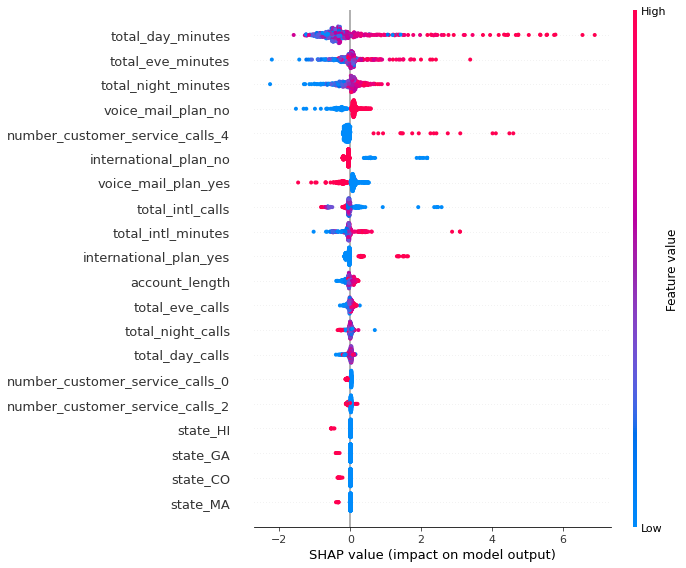

In [31]:
interpret_model(best)

###### Gain and Lift Charts

In [33]:
preds = predict_model(best,probability_threshold=0.5 ,data=test)
y_probas = preds[['Score']]
y_probas["Score2"] = 1 - y_probas["Score"]
y_test = preds[['Label']]
y_test['Label'][y_test.Label == "yes"] = 0
y_test['Label'][y_test.Label == "no"] = 1

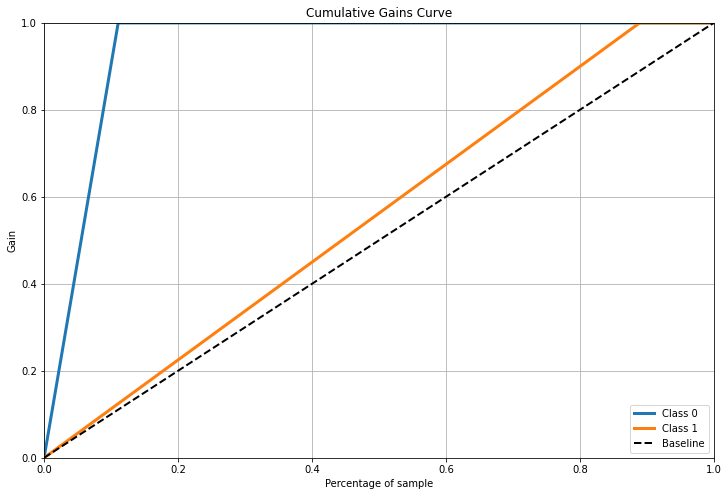

In [34]:
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, y_probas,figsize = (12,8))
plt.show()

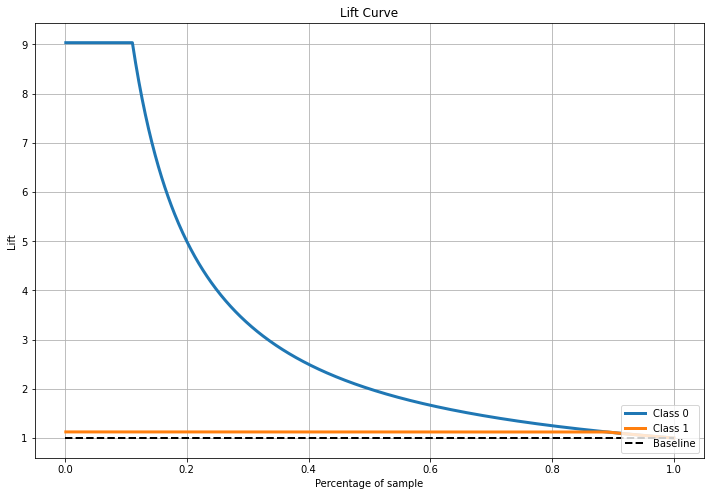

In [35]:
skplt.metrics.plot_lift_curve(y_test, y_probas, figsize = (12,8))
plt.show()

## Finalizing and Saving Model

In [35]:
final = finalize_model(best)
unseen_predictions = predict_model(final,probability_threshold=0.5 ,data=test)
unseen_predictions.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Label,Score
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,16.78,244.7,91,11.01,10.0,3,2.70,1,no,0.0578
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,18.75,203.9,118,9.18,6.3,6,1.70,0,no,0.0658
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,26.11,203.0,99,9.14,13.1,6,3.54,4,yes,0.8322
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,18.55,129.6,121,5.83,8.1,3,2.19,3,no,0.0253
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,23.55,250.7,115,11.28,15.5,5,4.19,3,no,0.0271


In [36]:
save_model(final,'model')

Transformation Pipeline and Model Succesfully Saved
